# Make-up homework assignment


## **Important**: rules for handing in the make-up assignment:

- You have to make this homework assignment on your own, so not in a team!
- Hand in the notebook (and nothing else) named as follows: StudentName_snumber.ipynb
- Provide clear and complete answers to the questions below under a separate header (not hidden somewhere in your source code), and make sure to explain your answers / motivate your choices. Add Markdown cells if necessary.
- Source code, output graphs, derivations, etc., should be included in the notebook. Make sure it is clear what each plot represents. 
- Hand-in: upload to Blackboard.
- For problems or questions (that are not readily answered by the lecture slides, book and/or a quick Google search) please send an email to tomh@cs.ru.nl.


# Part 1: classification and clustering

In this exercise we will apply Nearest Neighbor and K-means clustering to the seven included data sets `synth1` to `synth7`. These each consist of an attribute matrix `X` containing two attributes and a class vector `y`, and are split into a training set and test set. Note that in every subquestion, you should consider all data sets.

1.1 Create a scatter plot of X (both training and test set) for each of the data sets, with points colored according to their class. 

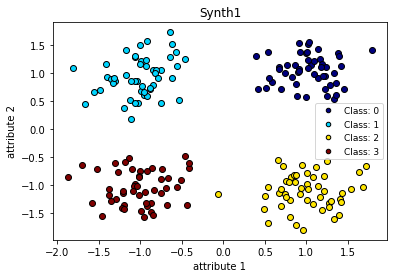

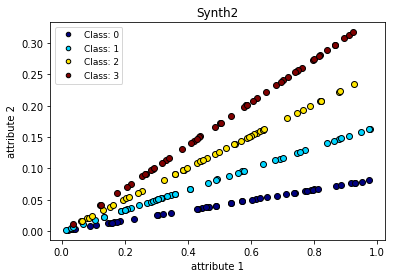

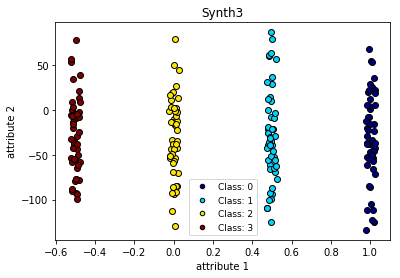

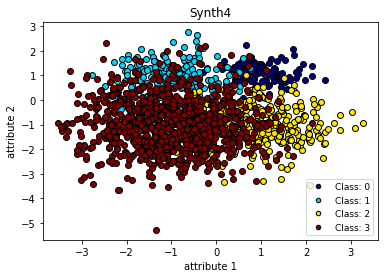

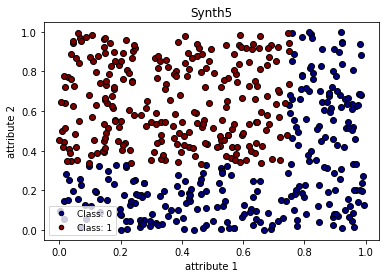

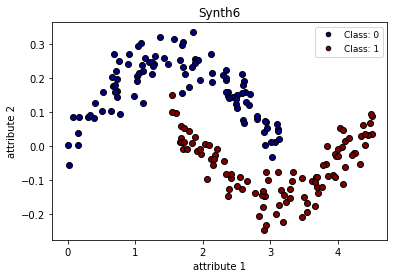

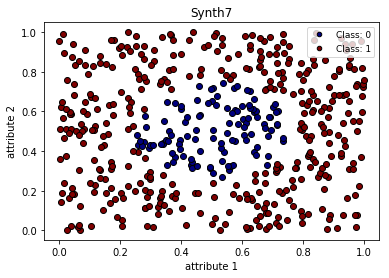

In [5]:
import seaborn as sn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
#part 1.1 code

for i in range(1,8):
    file_name = "./Data/synth" + str(i) +".mat"
    #print("Loading " + file_name)
    synth = loadmat(file_name)
    
    X = synth['X']
    y = synth['y']
    
    ncolors = np.size(np.unique(y))
    # plot data points color-coded by class
    #plt.hold(True)
    colors = [0]*ncolors
    for color in range(ncolors):
        colors[color] = plt.cm.jet.__call__((color*255)//(ncolors-1))[:3]
    for j, cs in enumerate(np.unique(y)):
        plt.plot(X[(y == cs).ravel(), 0], X[(y == cs).ravel(), 1], 'o',
                 markeredgecolor='k', markerfacecolor=colors[j], markersize=6,
                 zorder=2)
    #plt.hold(False)

    # create legend
    legend_items = (np.unique(y).tolist())
    for j in range(len(legend_items)):
        legend_items[j] = 'Class: {0}'.format(legend_items[j])
    plt.legend(legend_items, numpoints=1, markerscale=.75, prop={'size': 9})
    
    plt.title("Synth" + str(i))
    plt.xlabel('attribute 1')
    plt.ylabel('attribute 2')
    plt.show()

Describe for each of the data sets the patterns that you observe in the data. How are the attributes of the data points related to their class?

#### Double click to write your answers to part 1.1 here

**Synth1**: These classes look like _centre-based_ clusters. The attributes of each data point can be understood as a point in space. Each data  point belongs to a cluster that is based around a centroid. The classes correspond to these clusters 

**Synth2**: These classes correspsond 4 sets of linear relationships. Each class has its datapoints on a different line

**Synth3**: Similiarly to the above, except in this data set the relationship is only dependent on the attribute on the x-axis. Each class fits into a narrow range.

**Synth4**: Here classes correspond to overlapping clusters in 2D space. It's not clear from the visualisation how classes are distinguished where they over lap in space. They do however remain centred around some centroid.

**Synth5**: There classes seem to be distinguish based on a boundary set for both x and y. DPs within approximately x < 0.775 and y > 0.375 are part of Class 1 and all others are part of Class 0.

**Synth6**: The classes are based on denisity. There are two 'shapes' of high density. Classes are assigned based the DPs nearest neighbours class.

**Synth7**: The classes are based on a relation ship between x and y that describes an ellipse. One class is inside the boundary of the ellipse. The other class is outside of it

1.2 Use K-nearest neighbors classification with Euclidean distance measure to classify the test data. First, use ten-fold cross-validation on the training data (`X_train` / `y_train`) to determine the optimal K (vary K from 1 to 25). Plot the mean classification error rate across the ten folds as a function of K and determine for which value the classification error is lowest. With K set to this value, now classify the test data (`X_test`) using the training data as input and compute the classification error.**Make a new scatter plot of the data, with points in the training data colored according to their actual class and points in the test data according to their predicted class; use different plot symbols (e.g., circles and squares) for the training and test data.** Do the above for all data sets `synth1` to `synth7`.

   + You can use the `KNeighborsClassifier()` function from the package `sklearn.neighbors` to perform the nearest neighbor classification. Classify the data points in the test data based on its nearest neighbors in the training data.
   + You can use use the `Kfold()` function from the package `sklearn.model_selection` for the cross-validation. You should only use the training data for this part: in other words, the training data will itself be split into smaller training and test subsets.

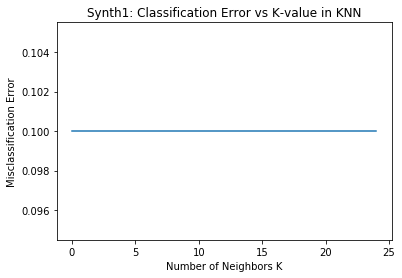

Accuracy score: 1.0
9


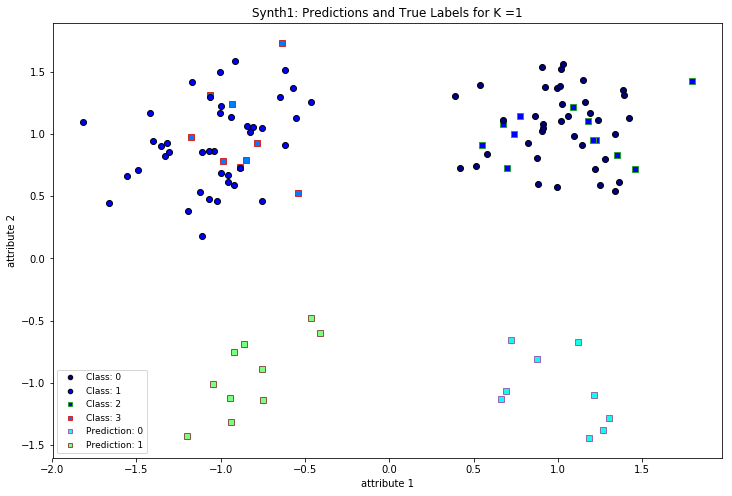

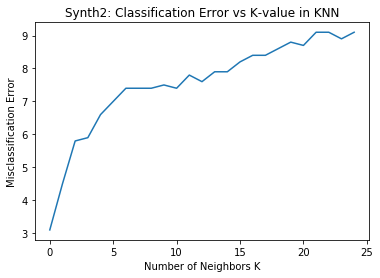

Accuracy score: 0.32
9


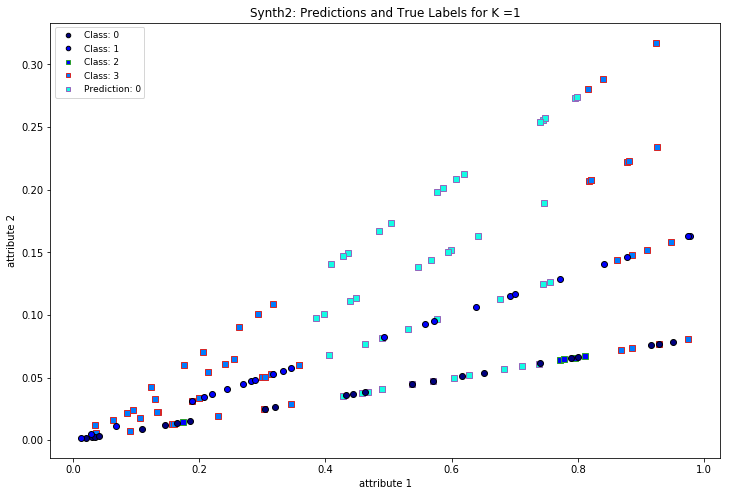

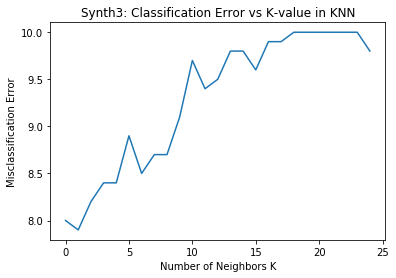

Accuracy score: 0.24
8


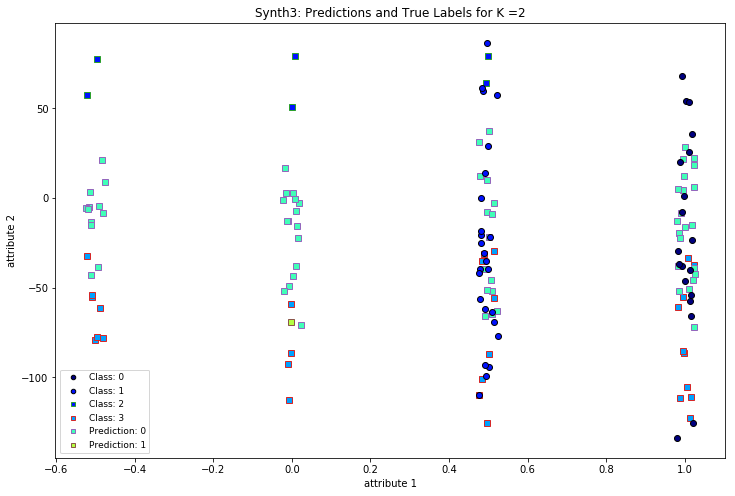

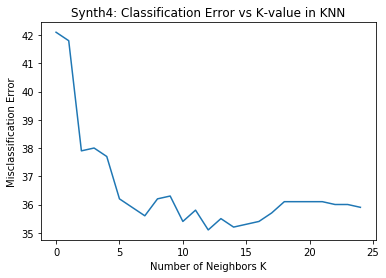

Accuracy score: 0.828125
9


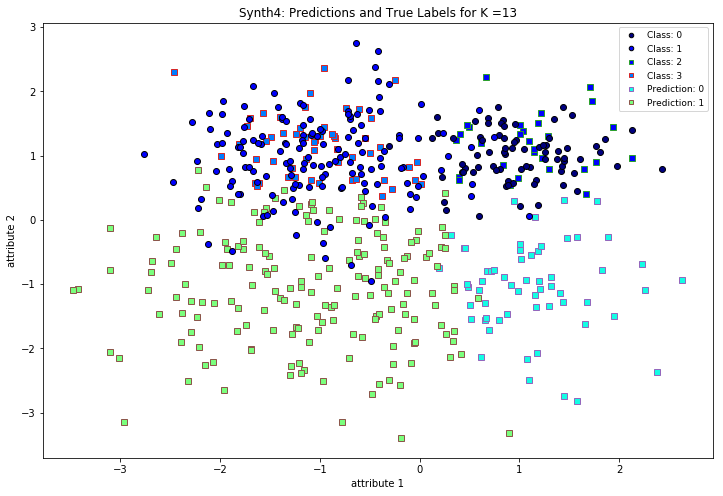

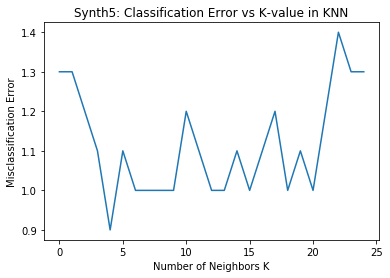

Accuracy score: 0.96
7


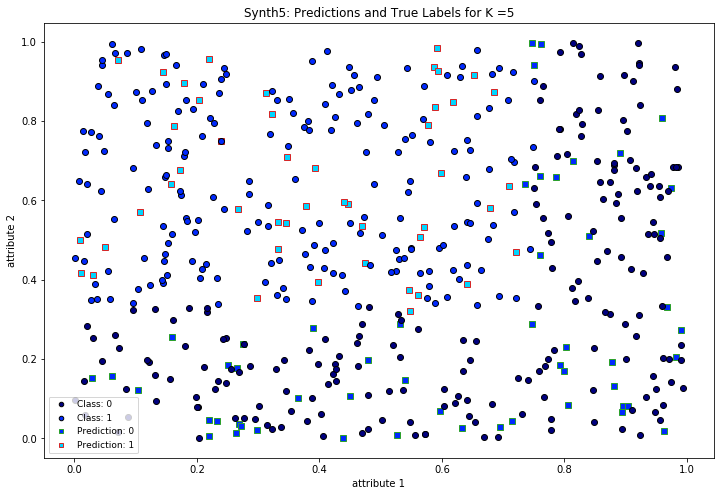

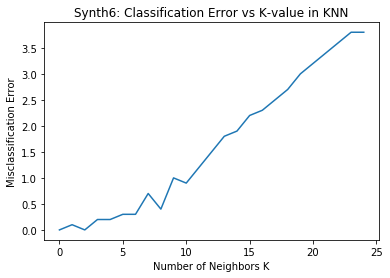

Accuracy score: 0.725
5


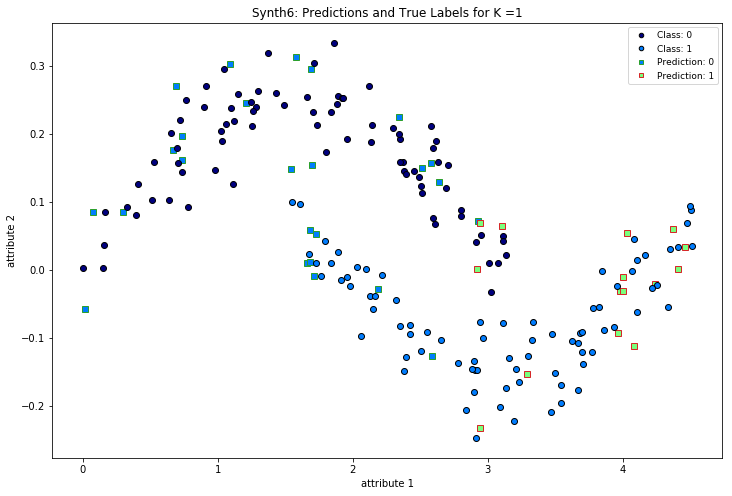

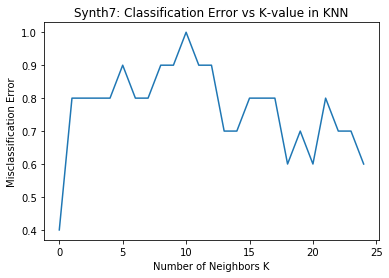

Accuracy score: 0.98
5


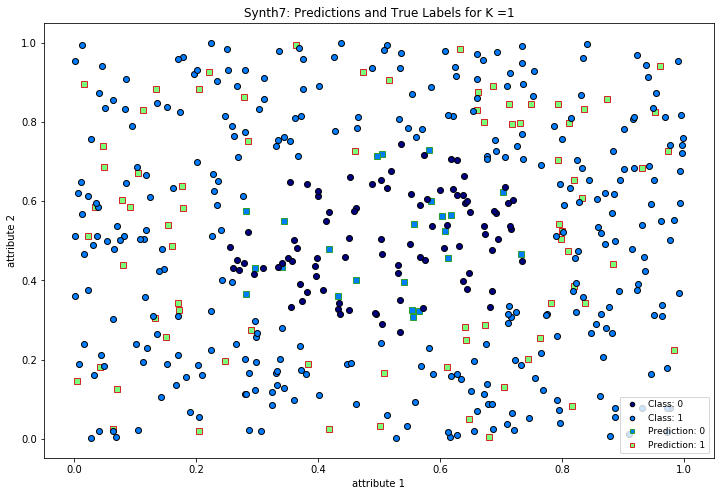

In [7]:
#part 1.2 code
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold
from sklearn import metrics

for k in range(1,8):
    file_name = "./Data/synth" + str(k) +".mat"
    synth = loadmat(file_name)

    N = 10
    X_train = synth['X_train']
    y_train = synth['y_train']
    X_test = synth['X_test']
    y_test = synth['y_test']

    K_error = []
    for i in range(1,26):
        #print("testing k =" +str(i))
        kf = KFold(n_splits=N)
        error = 0
        for train_index, test_index in kf.split(X_train,y_train):
            #print("TRAIN:", train_index, "\nTEST:", test_index)
            X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
            y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
            #print("training on fold:")

            knn = KNeighborsClassifier(n_neighbors=i)
            knn.fit(X_train_fold, y_train_fold.ravel())
            pred = knn.predict(X_test_fold)
            #print("X_test_fold: " + str(X_test_fold))
            #print("predictions: " + str(pred))
            #print("actual classes: " + str(y_test_fold.ravel()))

            #print(error.append(np.mean(pred != y_test)))
            for j in range(len(pred)):
                if(pred[j] != y_test_fold.ravel()[j]):
                    error += 1
            #print(error)
        K_error.append(error/N)
        #print(K_error)

    plt.plot(K_error)
    plt.title("Synth" + str(k) + ": Classification Error vs K-value in KNN")
    plt.xlabel('Number of Neighbors K')
    plt.ylabel('Misclassification Error')
    plt.show()
    #print(K_error)
    best_k = K_error.index(min(K_error))+1

    final_knn = KNeighborsClassifier(n_neighbors=best_k)

    # fitting the model
    final_knn.fit(X_train, y_train.ravel())

    # predict the response
    pred = knn.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, pred)
    # evaluate accuracy
    print("Accuracy score: " + str(accuracy))

    
#### PLotting
    nPreds = len(np.unique(preds.ravel()))
    nLabels= len(np.unique(y_train.ravel()))
    class_labels = np.unique(np.concatenate((preds.ravel(),y_train.ravel())))
    ncolors = nLabels + nPreds +1
    #print(ncolors)
    X_train = np.asarray(X_train)
    X_test = np.asarray(X_test)
    y_train = np.asarray(y_train)
    preds = np.asarray(pred)

    colors = [0]*ncolors
    for color in range(ncolors):
        colors[color] = plt.cm.jet.__call__((color*255)//(ncolors-1))[:3]

# plot data points color-coded by class, cluster markers and centroids
    colors = [0]*ncolors
    for color in range(ncolors):
        colors[color] = plt.cm.jet.__call__((color*255)//(ncolors-1))[:3]
    plt.figure(figsize=(12,8))
    #Plot training data. Colored according to actual class
    nLabelled = len(np.unique(y))
    for i, cs in enumerate(np.unique(y)):
        plt.plot(X_train[(y_train == cs).ravel(), 0], X_train[(y_train == cs).ravel(), 1], 'o',
                 markeredgecolor='k', markerfacecolor=colors[i], markersize=6,
                 zorder=2)
    for i, cr in enumerate(np.unique(preds)):
        plt.plot(X_test[(preds == cr).ravel(), 0], X_test[(preds == cr).ravel(), 1], 
                 's', markerfacecolor=colors[i+nLabelled-1], zorder=1)

    # create legend
    legend_items = (np.unique(y_train).tolist() + np.unique(preds).tolist())
    for i in range(len(legend_items)):
        if i < nLabels:
            legend_items[i] = 'Class: {0}'.format(legend_items[i])
        else:
            legend_items[i] = 'Prediction: {0}'.format(legend_items[i])
    plt.legend(legend_items, numpoints=1, markerscale=.75, prop={'size': 9})
    plt.title("Synth" + str(k) + ": Predictions and True Labels for K =" + str(best_k))
    plt.xlabel('attribute 1')
    plt.ylabel('attribute 2')
    plt.show()

For each of the data sets, describe how well the test data is classified, and what patterns (if any) there are in the mis-classified data points and how those patterns might be explained.

#### Double click to write your answers to part 1.2 here
**Synth1**: This test data is perfectly classified. There is no mis-classification

**Synth2**: This data is poorly classified. The pattern is for classification to be related to distance from the origin. Aditionally, there is one class that was predicted to have no memebers.

**Synth3**: This data is poorly classified. The pattern in mis-classification seems to be related to distance from the horizontal axis of the plot. It seems that DPs near the ends of the groups were confused with neighbours from adjacent groups

**Synth4**: This data is well classified. Any misclassification would occur in the overlaps of the groups.

**Synth5**: This test data is perfectly classified. There is no mis-classification

**Synth6**: This data is surpisingly well classified but still not perfect. Misclassification happens for DPs closer to the other group

**Synth7**: This test data is perfectly classified. There is no mis-classification

1.3 Use K-means clustering with Euclidean distance measure to cluster the data in X. First, run the K-means clustering for K = 1, …, 10 clusters and compute the purity and entropy. Plot purity and entropy as a function of K. Again, do this for all data sets `synth1` to `synth7`.

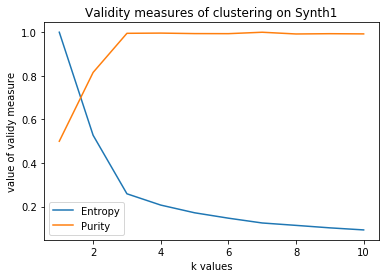

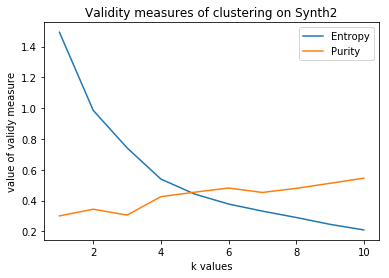

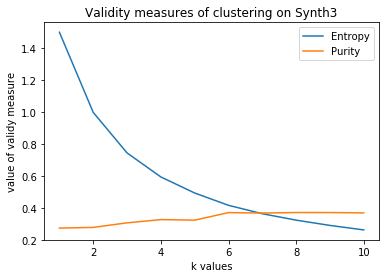

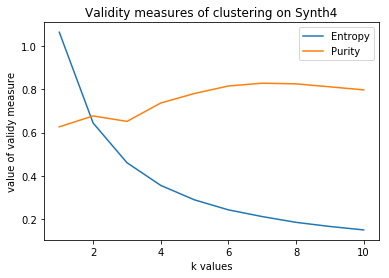

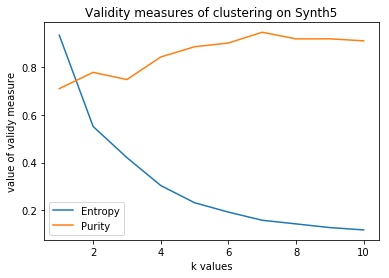

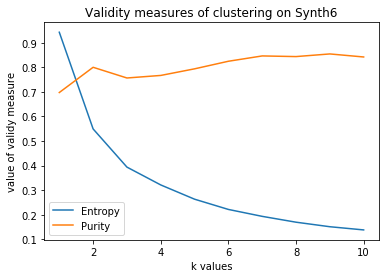

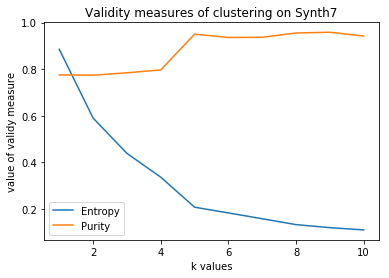

In [8]:
#part 1.3 code
##Answer to question 4.1.1b
##Answer to question 4.1.1a
from scipy.io import loadmat
import sklearn.cluster
import Toolbox.mod_clusterPlot as cp
import Toolbox.clusterVal as cv



for i in range(1,8):
    file_name = "./Data/synth" + str(i) +".mat"
    synth = loadmat(file_name)

    clusterVals = []
    for j in range(1,11):
        rslt = sklearn.cluster.k_means(synth['X'],j+1) #generate k_means for k = 1 ... 10
        #print(rslt[1])
        (e1,e2,_,_) = cv.clusterVal(synth['y'],rslt[1]) #compute cluster validity
        clusterVals.append((e1,e2)) 
    
    
    x_vals = np.arange(10)+1
    lineObjects = plt.plot(x_vals, clusterVals)
    plt.ylabel('value of validy measure')
    plt.xlabel('k values')
    plt.title("Validity measures of clustering on Synth" +str(i))
    plt.legend(lineObjects, ('Entropy', 'Purity'))
    plt.show()

What is the optimal number of clusters for each of the data sets? Does this correspond to the actual number of clusters in the data?

#### Double click to write your answers to part 1.3 here
Based on the purity measure (entropy is better for higher k in all data sets here);

**Synth1** Optimal number of clusters is anything greater than 3

**Synth2** Optimal number of clusters is at least 10

**Synth3** Optimal number of clusters is at least 10

**Synth4** Optimal number of clusters is 9

**Synth5** Optimal number of clusters is 7

**Synth6** Optimal number of clusters is 9

**Synth7** Optimal number of clusters is 10 

This does not corrsespond to the number of actual clusters in the data (if we consider clusters to correspond to the labels)

Generally speaking, 10 provides a high level of purity.

1.4 Make a new scatter plot of the data for every data set, with points colored to correspond to the K-means clustering (with K set to the actual number of clusters in the data).

   + You can use the function `k_means()` from the package sklearn.cluster to perform the clustering. The `clusterVal` function (in the `clusterVal.py` file) can be used to obtain the purity and entropy.
   + When comparing the K-means clustering to the real clustering, keep in mind that the numbers assigned to clusters by the `k_means()` function are arbitrary!

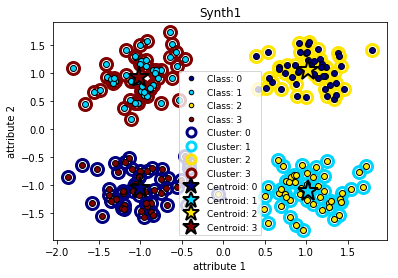

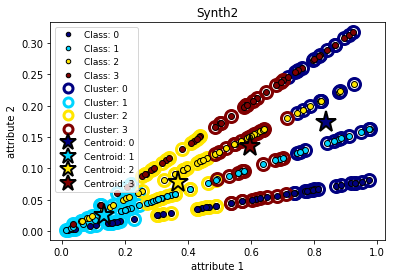

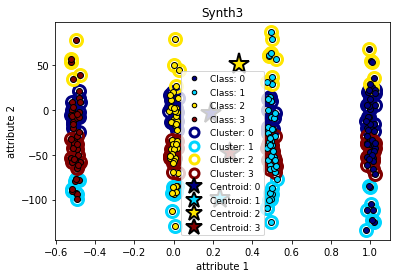

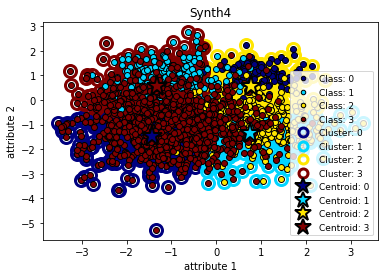

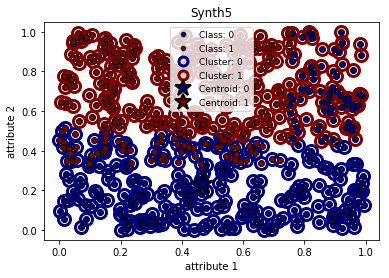

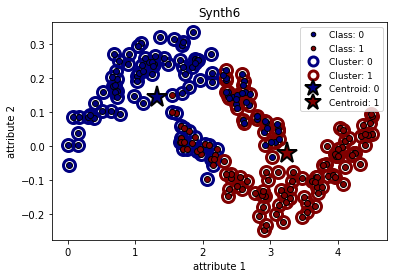

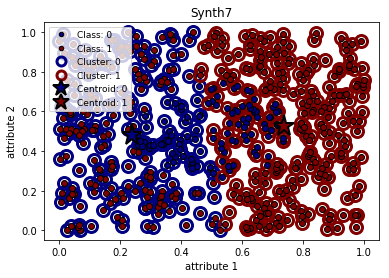

In [9]:
#part 1.4 code

for i in range(1,8):
    file_name = "./Data/synth" + str(i) +".mat"
    synth = loadmat(file_name)
    k = len(np.unique(synth['y']))
    rslt = sklearn.cluster.k_means(synth['X'],k)
    cp.clusterPlot(synth['X'],rslt[1],rslt[0],synth['y'])
    plt.title("Synth" + str(i))
    plt.xlabel('attribute 1')
    plt.ylabel('attribute 2')
    plt.show()
    #print(rslt[1])

Compare this to the scatter plots made in 1. How well does the K-means clustering correspond to the actual clustering in the data? To the extent that they do not correspond, can you explain where and why the K-means clustering goes wrong?


#### Double click to write your answers to part 1.4 here
K-means works well when the clusters are non-overlapping, dense, blob shapes. It does not work well when one cluster is surrounded by another. They do not work well if the clusters cannot be separated by a straight line. 
The only dataset that works well is synth1. None of the others are clustered based on their DPs proximty to some centroid.

# Part 2: Ensemble methods

In this exercise we will use ensemble methods in combination with Nearest Neighbor classification. In particular, we will use a method called ‘bagging’. Bagging works by creating M new training data sets by randomly sampling (with replacement) N data points from the original training data set. The test data is then classified with (in this case) the Nearest Neighbor classifier using each of these new training data sets, which results in M classifications for each data point in the test data. The final classification for each data point is the class that occurs most often among those M classifications.

For this part of the exercise, we will use the `synth4` data set. We will not use any cross-validation, but rather use the division into training and test data already in the data file. Use K = 1 and Euclidean distance (unless otherwise specified).

2.1. Explain in your own words how ensemble methods in general and bagging in particular can improve classification compared to just running the Nearest Neighbor algorithm once.

#### Double click to write your answers to part 2.1 here
Ensemble methods help to obtain more accurate classifications by combining the predictions of a variety of classification attempts. These attemps can differ in regards to the algorithms used or the distribution of the datapoints that each algorithm iteration is run on. The creation of M new data sets from the original set helps to improve estimates or variance and mean of the true population that the sample has come from. This is called bootstrapping
Bagging is bootstrapping followed by application of a classification algorithm to the newly created data sets. When used with decision tree classifiers, it can prevent overfitting. This happends because classification is done according to a diverse collection of sets (even thought they actually all come from the same set), and it is much more difficult to overfit to several datasets simultaneously.

2. Classify the test data with the KNN classifier and compute the classification error.

In [10]:
#part 2.2 code

k = 1
file_name = "./Data/synth" + str(4) +".mat"
synth4 = loadmat(file_name)

X_train = synth4['X_train']
y_train = synth4['y_train']
X_test = synth4['X_test']
y_test = synth4['y_test']
knn = KNeighborsClassifier(n_neighbors=k)

# fitting the model
knn.fit(X_train, y_train.ravel())

# predict the response
pred = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, pred)
# evaluate accuracy
print("Classification Error: " + str(1 - accuracy))


Classification Error: 0.20625000000000004


3. Use Nearest Neighbor classification with bagging to classify the test data. Use M = 1000 ‘bags’, and set N to 10% of the training data sample size. Compute the classification error.

In [11]:
#part 2.3 code
#part 2.2 code
from sklearn.ensemble import BaggingClassifier
k = 1
file_name = "./Data/synth" + str(4) +".mat"
synth4 = loadmat(file_name)

X_train = synth4['X_train']
y_train = synth4['y_train']
X_test = synth4['X_test']
y_test = synth4['y_test']
knn = KNeighborsClassifier(n_neighbors=k)

bagging = BaggingClassifier(knn, n_estimators=1000, max_samples=0.10)
bagging.fit(X_train, y_train.ravel())
bagging_predict = bagging.predict(X_test)

accuracy = metrics.accuracy_score(y_test, bagging_predict)
# evaluate accuracy
print("Classification Error: " + str(1 - accuracy))


Classification Error: 0.171875


Did the classification improve compared to the classification without bagging in step 2?

#### Double click to write your answers to part 2.3 here

Yes it did

4. Make a scatter plot of the data. Color the training data points according to their class. For the test data points, use different colors/plot symbols/points sizes to indicate which of those are A) correctly classified both times (step 2 and 3), B) correctly classified in step 3 but not step 2 and C) not correctly classified in step 3. Make sure that they are visually easy to distinguish from each other and the training data points.

In [ ]:
#part 2.4 code

Do you see any pattern in the test data points, where the bagging improves the classification?

#### Double click to write your answers to part 2.4 here

5. Repeat step 3 but set N to 5%, 50% and 100% of the training data sample size, and compute the classification error for each.

In [12]:
#part 2.5 code
#part 2.3 code
#part 2.2 code

for N in [0.05,0.5,1]:
    from sklearn.ensemble import BaggingClassifier
    k = 1
    file_name = "./Data/synth" + str(4) +".mat"
    synth4 = loadmat(file_name)

    X_train = synth4['X_train']
    y_train = synth4['y_train']
    X_test = synth4['X_test']
    y_test = synth4['y_test']
    knn = KNeighborsClassifier(n_neighbors=k)

    bagging = BaggingClassifier(knn, n_estimators=1000, max_samples=N)
    bagging.fit(X_train, y_train.ravel())
    bagging_predict = bagging.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, bagging_predict)
    # evaluate accuracy
    print("Classification Error: " + str(1 - accuracy))


Classification Error: 0.16249999999999998
Classification Error: 0.19062500000000004
Classification Error: 0.40312499999999996


Explain why the bagging classifier works better when you do not use all of the training data.

#### Double click to write your answers to part 2.5 here
#### Answer:
Using all the data will nothing to improve the classification because defeats the purpose of bagging in the first place. i.e. you're just getting the same result M times.

6. Repeat steps 2 and 3 but with K set to the optimal value you determined for `synth4` in part 1.

In [13]:
#part 2.2 code

k = 9
file_name = "./Data/synth" + str(4) +".mat"
synth4 = loadmat(file_name)

X_train = synth4['X_train']
y_train = synth4['y_train']
X_test = synth4['X_test']
y_test = synth4['y_test']
knn = KNeighborsClassifier(n_neighbors=k)

# fitting the model
knn.fit(X_train, y_train.ravel())

# predict the response
pred = knn.predict(X_test)

accuracy = metrics.accuracy_score(y_test, pred)
# evaluate accuracy
print("Classification Error (no bagging): " + str(1 - accuracy))

#part 2.3 code
#part 2.2 code
from sklearn.ensemble import BaggingClassifier
k = 1
file_name = "./Data/synth" + str(4) +".mat"
synth4 = loadmat(file_name)

X_train = synth4['X_train']
y_train = synth4['y_train']
X_test = synth4['X_test']
y_test = synth4['y_test']
knn = KNeighborsClassifier(n_neighbors=k)

bagging = BaggingClassifier(knn, n_estimators=1000, max_samples=0.10)
bagging.fit(X_train, y_train.ravel())
bagging_predict = bagging.predict(X_test)

accuracy = metrics.accuracy_score(y_test, bagging_predict)
# evaluate accuracy
print("Classification Error (bagging): " + str(1 - accuracy))


Classification Error (no bagging): 0.1875
Classification Error (bagging): 0.16562500000000002


Does the bagging still improve the classification?

#### Double click to write your answers to part 2.6 here

##### Answer
Yes. It seems to.

7. Suppose you have a very small data set with one test data point of class A and five training data points, with the closest one of class B and the other four of class A. When bagging, what is the proportion of bags for which the test data point would be classified as class B (that is, what is the probability that the ‘class B’ point is selected when sampling with replacement)? Answer this question for N = 1, N = 2, N = 5 and N = 10.

#### Double click to write your answers to part 2.7 here

##### N = 1
0.2
##### N = 2
(0.2 * 0.2) + (0.2 * 0.8) * 2 = 0.36
##### N = 5
0.9523
##### N = 10
= ?